In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import random

In [304]:
df_GENIE_BPC=pd.read_csv('Data/nsclc_221219_v1.csv',header=0)

df_GENIE_BPC.shape

C:\Users\sonm\AppData\Local\Temp\ipykernel_10864\1357201006.py:1: DtypeWarning: Columns (52,54,55,56,58,60,61,62,63,66,68,69,70,71,72,74,75,76,77,81,82,90,91,92,93,868) have mixed types. Specify dtype option on import or set low_memory=False.
  df_GENIE_BPC=pd.read_csv('Data/nsclc_221219_v1.csv',header=0)


(1060, 955)

In [305]:
df_GENIE_BPC['cpt_seq_assay_id'].unique()

array(['DFCI-ONCOPANEL-2', 'DFCI-ONCOPANEL-1', 'DFCI-ONCOPANEL-3',
       'MSK-IMPACT410', 'MSK-IMPACT468', 'MSK-IMPACT341', 'UHN-48-V1',
       'UHN-50-V2', 'VICC-01-SOLIDTUMOR', 'VICC-01-T7', 'VICC-01-T5A'],
      dtype=object)

In [306]:
#list(df_GENIE_BPC.columns)

In [307]:
# Choose the MSK pannels only
df_GENIE_BPC_MSK=df_GENIE_BPC.loc[df_GENIE_BPC['cpt_seq_assay_id'].isin([ 'MSK-IMPACT410', 'MSK-IMPACT468', 'MSK-IMPACT341'])]

In [308]:
genes = ['TP53',
 'KRAS',
 'LRP1B',
 'EGFR',
 'SPTA1',
 'STK11',
 'COL7A1',
 'KEAP1',
 'PRKDC',
 'RBM10',
 'FAT1',
 'ATM',
 'PTPRD',
 'GRM3',
 'SLIT2',
 'SETBP1',
 'SMARCA4',
 'GLI3',
 'NF1',
 'ARID1A',
 'POLQ',
 'PTPRT',
 'KEL',
 'GLI2',
 'SETD2',
 'EPHA5',
 'MGA',
 'ATRX',
 'EPHA3',
 'POT1',
 'TLR4',
 'BCORL1',
 'PIK3CA',
 'RANBP2',
 'FANCM',
 'ALK',
 'NTRK3',
 'DOCK8',
 'NRG1',
 'BRAF',
 'APC',
 'PREX2',
 'PIK3C2B',
 'KAT6B',
 'RB1',
 'MET',
 'MED12',
 'CUX1',
 'FLT1',
 'BRCA2',
 'TERT',
 'TOPBP1',
 'ARHGEF12',
 'ABCB11',
 'ERBB4',
 'ARID2',
 'RUNX1T1',
 'CDKN2A',
 'ZFHX3',
 'ARID1B',
 'RIF1',
 'KIF1B',
 'PAXIP1',
 'CDH4',
 'KCNQ1',
 'KDR',
 'DMD',
 'FRS2',
 'MAGI2',
 'PIK3CG',
 'BTG1',
 'AR',
 'EPHA7',
 'BCOR',
 'GRIN2A',
 'CREBBP',
 'PDGFRA',
 'NEIL3',
 'NOTCH3',
 'NOTCH1',
 'DEPDC5',
 'ROS1',
 'NOTCH4',
 'HGF',
 'NOTCH2',
 'TSC2',
 'DNMT3A',
 'SMAD4',
 'KAT6A',
 'TET2',
 'TRIM37',
 'SLC25A13',
 'SLC34A2',
 'CARD11',
 'KDM6B',
 'ERBB2',
 'MECOM',
 'RECQL4',
 'EP300',
 'POLE',
 'FLT4',
 'USP28',
 'PML',
 'ITK',
 'BCL11B',
 'ERCC6',
 'PTPN14',
 'EXO1',
 'CBFA2T3',
 'LIG4',
 'ARHGAP35',
 'BRCA1',
 'NTRK1',
 'FANCA',
 'EPHB1',
 'MTOR',
 'GLI1',
 'WRN',
 'TET1',
 'RET',
 'STAG2',
 'IKZF1',
 'DOT1L',
 'TFE3',
 'KDM5C',
 'ASXL1',
 'PDGFRB',
 'CADM2',
 'PBRM1',
 'RBL2',
 'DROSHA',
 'SPEN',
 'PTEN',
 'GABRA6',
 'HSD3B1',
 'HSP90AA1',
 'TAF1',
 'SLX4',
 'INPP4B',
 'FGF14',
 'FGF23',
 'GID4',
 'PAK3',
 'SOX10',
 'STAT4',
 'DDR2',
 'ERCC5',
 'SLITRK6',
 'SMC1A',
 'PIK3C2G',
 'FANCD2',
 'ZNF217',
 'NFE2L2',
 'ATR',
 'CIITA',
 'STAT6',
 'FANCI',
 'CTNNB1',
 'CSF1R',
 'FANCB',
 'NR0B1',
 'FAN1',
 'MTA1',
 'RHBDF2',
 'PTCH1',
 'PGR',
 'BARD1',
 'SMO',
 'KIT',
 'EXT1',
 'SOS1',
 'RICTOR',
 'DICER1',
 'TBX3',
 'BRIP1',
 'PALB2',
 'FLT3',
 'DIS3',
 'DIS3L2',
 'UIMC1',
 'USP8',
 'HABP2',
 'CIC',
 'SMC3',
 'JAK3',
 'POLD1',
 'PRPF40B',
 'PRDM14',
 'KDM6A',
 'NSD1',
 'SF3B1',
 'XPC',
 'BRD4',
 'RASA1',
 'TP53BP1',
 'IL7R',
 'MAP3K1',
 'ERBB3',
 'JAK2',
 'SQSTM1',
 'IRS1',
 'LATS1',
 'MAX',
 'PRPF8',
 'STAG1',
 'CRTC2',
 'GATA3',
 'BAP1',
 'RBBP8',
 'DDB1',
 'PNKP',
 'PTK2B',
 'RELA',
 'NEIL1',
 'MCM8',
 'CDH1',
 'GATA6',
 'ERCC4',
 'BLM',
 'PMS2',
 'FBXW7',
 'TCF3',
 'RPTOR',
 'IGF1R',
 'PRSS1',
 'PRF1',
 'PMS1',
 'MSH6',
 'NTRK2',
 'MDC1',
 'TP63',
 'CSF3R',
 'GSTM5',
 'PRAME',
 'INPPL1',
 'PRKD1',
 'PIK3R1',
 'KDM5A',
 'ANKRD11',
 'BUB1B',
 'INHBA',
 'TGFBR1',
 'TSC1',
 'AKT3',
 'NKX2.1',
 'AXL',
 'WT1',
 'CUL3',
 'CDK12',
 'ERCC3',
 'FGFR1',
 'DKC1',
 'EME1',
 'RHOT1',
 'BRD3',
 'RAD54B',
 'TAL1',
 'NBN',
 'FGFR4',
 'ERCC2',
 'MSH2',
 'RSPO2',
 'ZNRF3',
 'GEN1',
 'RAD50',
 'CBLB',
 'GPC3',
 'FANCL',
 'U2AF1',
 'NF2',
 'CHEK2',
 'IRS2',
 'TGFBR2',
 'PIK3C3',
 'GATA4',
 'ETV5',
 'CYLD',
 'ZNF708',
 'PTK2',
 'TCF7L1',
 'UPF1',
 'RUNX1',
 'PLCG2',
 'NCOR1',
 'ABL1',
 'FUS',
 'EXT2',
 'MYBL1',
 'SDHA',
 'SOX9',
 'ETV1',
 'FGFR2',
 'ABL2',
 'ACVR1B',
 'CHD4',
 'LZTR1',
 'SNCAIP',
 'ESR1',
 'PTPRS',
 'FGF6',
 'PRSS8',
 'ZNF703',
 'FOXL2',
 'TSHR',
 'KLF4',
 'AXIN2',
 'ARAF',
 'KCNIP1',
 'TEK',
 'RHPN2',
 'SF1',
 'FANCG',
 'DDB2',
 'CRTC1',
 'RPA1',
 'CTNNA1',
 'WAS',
 'ENG',
 'BRCC3',
 'MLH3',
 'TLX3',
 'XRCC5',
 'MBD4',
 'UROD',
 'RINT1',
 'TRAF3',
 'GBA',
 'JAZF1',
 'MUS81',
 'HELQ',
 'TDG',
 'CBL',
 'BTK',
 'INSR',
 'PDCD1',
 'MEN1',
 'XPO1',
 'PPP2R1A',
 'JAK1',
 'DAXX',
 'RNF43',
 'MYB',
 'FAS',
 'EWSR1',
 'ETV4',
 'FANCF',
 'HNF1A',
 'CDKN1C',
 'TCF7L2',
 'FH',
 'FUBP1',
 'PRKCI',
 'INPP4A',
 'SOX17',
 'MYOD1',
 'FGFR3',
 'MUTYH',
 'PAX5',
 'CDC73',
 'INSIG1',
 'SUZ12',
 'PRKCZ',
 'RECQL',
 'EZH1',
 'CYSLTR2',
 'RTEL1',
 'AGO2',
 'NUP93',
 'GNAS',
 'MAP3K13',
 'ETV6',
 'HOXB13',
 'DNMT1',
 'LATS2',
 'ARID5B',
 'RAD51D',
 'BCL2L12',
 'NFKBIA',
 'CEBPA',
 'SYK',
 'TMPRSS2',
 'FLCN',
 'MITF',
 'BCL6',
 'RARA',
 'PRDM1',
 'RAD21',
 'B2M',
 'HLA.A',
 'FOXP1',
 'PIK3R2',
 'CTCF',
 'IGF2',
 'XRCC1',
 'MAF',
 'NT5C2',
 'ELANE',
 'SERPINA1',
 'HMBS',
 'EGLN1',
 'MAFB',
 'ID4',
 'NEIL2',
 'SMARCE1',
 'RNF8',
 'MLH1',
 'MALT1',
 'FANCC',
 'SUFU',
 'MAP2K4',
 'MYCN',
 'ALOX12B',
 'HIST1H1C',
 'ASXL2',
 'PIK3CD',
 'NEGR1',
 'PHF6',
 'LMO2',
 'MAP2K1',
 'MAP2K2',
 'CDKN1B',
 'CCNE1',
 'MST1R',
 'CDK2',
 'FKBP9',
 'MSH3',
 'ELF3',
 'SMYD3',
 'MAPKAP1',
 'TAP2',
 'NUF2',
 'PPP4R2',
 'NCOA3',
 'STAT5B',
 'INHA',
 'SH2B3',
 'NRAS',
 'REL',
 'TNFAIP3',
 'RAF1',
 'RAD51C',
 'GATA2',
 'PHOX2B',
 'NFKBIZ',
 'SBDS',
 'XRCC3',
 'AURKA',
 'CCND2',
 'EZH2',
 'GATA1',
 'PTPN11',
 'BIRC3',
 'FYN',
 'DNMT3B',
 'YES1',
 'SHQ1',
 'STAT3',
 'ERG',
 'BMPR1A',
 'MDM4',
 'RIT1',
 'EED',
 'ZRSR2',
 'MPL',
 'PARP1',
 'TOP1',
 'SMARCD1',
 'GSK3B',
 'FGF4',
 'FGF3',
 'MDM2',
 'SMAD2',
 'CDK6',
 'NPRL3',
 'IKZF3',
 'CDK1',
 'CDK9',
 'SESN3',
 'RXRA',
 'STK19',
 'SHOC2',
 'BABAM1',
 'RSPO3',
 'DCLRE1C',
 'HFE',
 'XRCC4',
 'KLLN',
 'ERCC1',
 'IDH1',
 'HIST1H3D',
 'MAPK3',
 'CENPA',
 'TRAF7',
 'PLK2',
 'XIAP',
 'PIK3R3',
 'RPS6KA4',
 'CCND1',
 'SOX2',
 'CRLF2',
 'AKT2',
 'CDKN2C',
 'AKT1',
 'IRF4',
 'RAD54L',
 'HLA.B',
 'LYN',
 'PPM1D',
 'SDHC',
 'PRKAR1A',
 'CDK4',
 'AURKB',
 'CD79B',
 'FOXA1',
 'EPCAM',
 'FOXO1',
 'HIST1H3E',
 'STAT5A',
 'HIST3H3',
 'SRSF2',
 'GALNT12',
 'IFNGR1',
 'EIF1AX',
 'E2F3',
 'H3F3C',
 'CDK8',
 'SPOP',
 'IDH2',
 'CCND3',
 'LMO1',
 'MYC',
 'MYD88',
 'MCL1',
 'BCL2',
 'GNA11',
 'AXIN1',
 'PIK3CB',
 'FGF19',
 'CALR',
 'FANCE',
 'YAP1',
 'PNRC1',
 'VEGFA',
 'CHEK1',
 'GNAQ',
 'NPRL2',
 'CDK5',
 'LMO3',
 'CD58',
 'PTP4A1',
 'TAP1',
 'KNSTRN',
 'RRAS2',
 'RAC2',
 'CSDE1',
 'SESN1',
 'EPAS1',
 'DUSP4',
 'SESN2',
 'HIST1H3G',
 'TRAF2',
 'GPS2',
 'STK40',
 'RPS6KB2',
 'PIM1',
 'TMEM127',
 'SH2D1A',
 'ERRFI1',
 'CD274',
 'SDHB',
 'WWTR1',
 'NTHL1',
 'IGF1',
 'XRCC2',
 'SMARCB1',
 'VHL',
 'QKI',
 'RHEB',
 'ID3',
 'HRAS',
 'CDKN1A',
 'CDKN2B',
 'RHOH',
 'NFKBIE',
 'DMC1',
 'UBE2T',
 'POLH',
 'MTAP',
 'XRCC6',
 'KLF2',
 'POLB',
 'SRC',
 'ACVR1',
 'CXCR4',
 'HIST1H3I',
 'EIF4A2',
 'DNAJB1',
 'CTLA4',
 'HIST1H3B',
 'PAK1',
 'BCL2L11',
 'HIST1H2BD',
 'PPARG',
 'CASP8',
 'RAD51',
 'CD79A',
 'SMAD3',
 'JUN',
 'IKBKE',
 'HIST1H3C',
 'NKX3.1',
 'RHOA',
 'SDHAF2',
 'BCL2L1',
 'SDHD',
 'CRKL',
 'SOCS1',
 'RPL26',
 'PSMD13',
 'RRAGC',
 'RRAS',
 'SPRED1',
 'MSI2',
 'CARM1',
 'NPM1',
 'HIST1H3H',
 'HIST1H3F',
 'HIST1H3J',
 'IL10',
 'EGFL7',
 'DCUN1D1',
 'VTCN1',
 'RAD51B',
 'TNFRSF14',
 'PDCD1LG2',
 'GREM1',
 'CBFB',
 'RAD52',
 'RAC1',
 'SS18',
 'XPA',
 'MAPK1',
 'H3F3A',
 'RAB35',
 'MST1',
 'BCL10',
 'EIF4E',
 'PPP6C',
 'CD276',
 'ICOSLG',
 'BBC3',
 'RYBP',
 'PDPK1',
 'H3F3B']

## Sec 2. Use the Gene mutation data only:

df_GENIE_BPC_MSK[genes].dropna(axis=1)

In [310]:
x=df_GENIE_BPC_MSK[genes].dropna(axis=1)
x

,TP53,KRAS,EGFR,STK11,KEAP1,RBM10,FAT1,ATM,PTPRD,SMARCA4,...,GREM1,CBFB,RAD52,RAC1,MAPK1,CD276,ICOSLG,BBC3,RYBP,PDPK1
366,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
tensor_x=torch.from_numpy(x.values.astype(np.float32))
tensor_x.shape

torch.Size([513, 328])

In [312]:
# Define hyperparameters
# input size is the number of inputs
input_size = tensor_x.shape[1]
hidden_dim = 40
latent_dim = 2

output_size = tensor_x.shape[1]
#batch_size = 128
#epochs = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create directory to save the reconstructed and sampled images (if directory not present)
sample_dir = 'results'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

In [313]:
# VAE model
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2_mean = nn.Linear(hidden_dim, latent_dim)
        self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_size)

        def init_weights(m):
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                m.bias.data.fill_(0.01)
        self.apply(init_weights)
        #model.apply(init_weights)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        mu = self.fc2_mean(h)
        #log_var = self.fc2_logvar(h)
        # Clamp logvar to avoid extreme values: 
        log_var = torch.clamp(self.fc2_logvar(h), min=-10, max=10)
        return mu, log_var
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(logvar/2)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h = F.relu(self.fc3(z))
        out = torch.sigmoid(self.fc4(h))
        return out
    
    def forward(self, x):
        # x: (batch_size, 1, 28,28) --> (batch_size, 784)
        #mu, logvar = self.encode(x.view(-1, input_size))
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar, z 




In [314]:

# Define Loss
def loss_function(reconstructed_label, original_label, mu, logvar,beta):
    #bce = F.binary_cross_entropy(reconstructed_label, original_label.view(-1, input_size), reduction = 'sum')
    bce = F.binary_cross_entropy(reconstructed_label, original_label, reduction = 'sum')
    
    # kld = torch.sum(0.5 * torch.sum(logvar.exp() + mu.pow(2) - 1 - logvar, 1))
    kld = 0.5 * torch.sum(logvar.exp() + mu.pow(2) - 1 - logvar)
    return bce + beta*kld
    


# checking the training and test data set together

In [315]:
from sklearn.model_selection import train_test_split


# Split data into training and testing sets
#X_train, X_test, y_train, y_test =

In [316]:
X_train, X_test = train_test_split(tensor_x, test_size=0.2, random_state=42)
X_train

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.]])

In [317]:
X_train, X_test = train_test_split(tensor_x, test_size=0.2, random_state=42)
X_train

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.]])

In [318]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if using multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)

set_seed(20250403)  


# Define model and optimizer, depends on the seed !
model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)



epochs=10000
train_losses = []
test_losses = []
reconstruction_loss=[]
mu_history=[]
logvar_history=[]


# Early stopping parameters
patience = 5

# Train function

for epoch in range(1, epochs + 1):
    # Beta Annealing 
    # Gradually increase the weight of the KL term during training: 
    # This gives the model a chance to learn useful reconstructions before being forced to regularize too hard.
    #beta_value = min(1.0, epoch / epochs)
    beta_value = 5
    
    # Evaluate on training data
    model.train()
    reconstructed, mu, logvar, z = model(X_train)
    mu_history.append(mu)
    logvar_history.append(logvar)
    
    loss = loss_function(reconstructed, X_train, mu, logvar,beta_value)
    optimizer.zero_grad()
    loss.backward()
    train_losses.append(loss.item())
    optimizer.step()

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        reconstructed_test, mu_test, logvar_test, z_test = model(X_test)
    
        loss_test = loss_function(reconstructed_test, X_test, mu_test, logvar_test,beta_value)
        #loss.backward()
        test_losses.append(loss_test.item())

    
    if epoch % 1000 == 0:
        print("Train Epoch {} \tLoss_train: {:.3f} \tLoss_test: {:.3f}".format(epoch, loss.item()/len(X_train), loss_test.item()/len(X_test)))

    if epoch>5:
        test_sum_check=0
        for j in range(epoch,epoch-5,-1):
            if test_losses[j-1] > test_losses[j-2]:
                test_sum_check+=1
        if test_sum_check==5:
            print(f"Early stopping at epoch {epoch} — no test loss improvement in the last {patience} epochs.")
            break
            
        



Train Epoch 1000 	Loss_train: 26.867 	Loss_test: 25.921
Early stopping at epoch 1608 — no test loss improvement in the last 5 epochs.


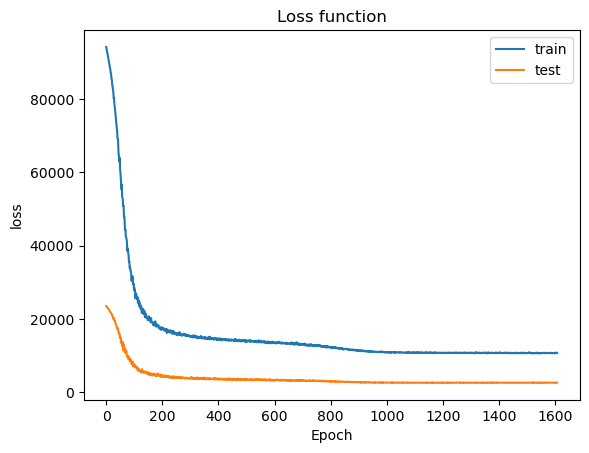

In [319]:
plt.plot(train_losses)
plt.plot(test_losses)
#plt.ylim(0,10)
plt.legend(['train','test'])

plt.title('Loss function')
plt.xlabel('Epoch')
plt.ylabel('loss')


plt.savefig('GENIE_BPC_VAE_loss_gene_mutations_tt_early_stopping_beta_5.png')

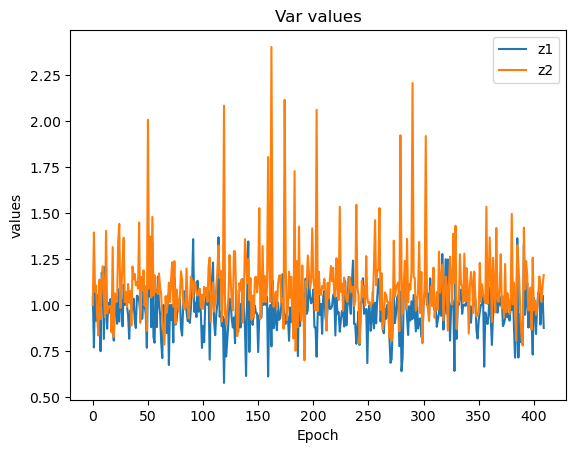

In [320]:
plt.plot(np.exp(logvar_history[0].detach().numpy()[:,0]))
plt.plot(np.exp(logvar_history[0].detach().numpy()[:,1]))
#plt.plot(logvar_history.detach().numpy())

plt.legend(['z1','z2'])

plt.title('Var values')
plt.xlabel('Epoch')
plt.ylabel('values')

plt.savefig('GENIE_BPC_latent_variables_Var_early_stopping_beta_5.png')

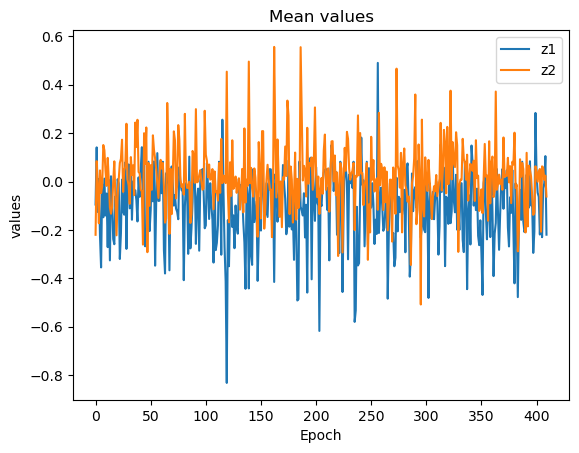

In [321]:
plt.plot(mu_history[0].detach().numpy()[:,0])
plt.plot(mu_history[0].detach().numpy()[:,1])
#plt.plot(logvar_history.detach().numpy())

plt.legend(['z1','z2'])

plt.title('Mean values')
plt.xlabel('Epoch')
plt.ylabel('values')

plt.savefig('GENIE_BPC_latent_variables_mean_early_stopping_beta_5.png')

C:\Users\sonm\AppData\Local\Temp\ipykernel_10864\465931178.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


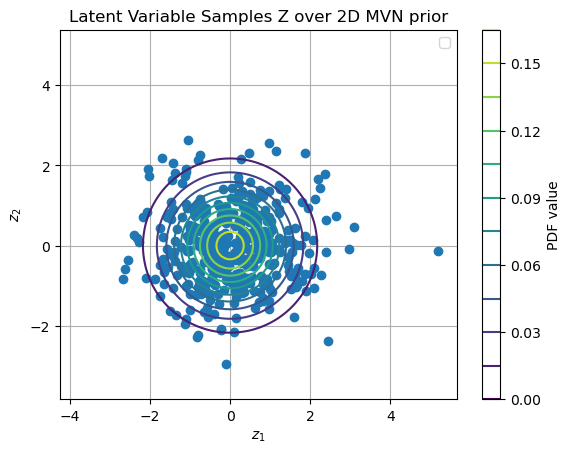

In [322]:
from scipy.stats import multivariate_normal

# 1. Generate some 2D scatter data
np.random.seed(42)
mean = [0,0]
cov = [[1.0, 0.0],
       [0.0, 1.0]]
data = np.random.multivariate_normal(mean, cov, size=300)

# 2. Create a grid over which to evaluate the PDF
x = np.linspace(min(data[:, 0]) - 1, max(data[:, 0]) + 1, 100)
y = np.linspace(min(data[:, 1]) - 1, max(data[:, 1]) + 1, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 3. Define the multivariate normal distribution
rv = multivariate_normal(mean=mean, cov=cov)
Z = rv.pdf(pos)

plt.plot(z.detach().numpy()[:,0],z.detach().numpy()[:,1],'o')




# Contour plot of the PDF
plt.contour(X, Y, Z, levels=10, cmap='viridis', linewidths=1.5)
plt.colorbar(label='PDF value')

plt.title('Latent Variable Samples Z over 2D MVN prior')
plt.xlabel(r'$z_{1}$')
plt.ylabel(r'$z_{2}$')
plt.legend()
plt.grid(True)
plt.axis('equal')
#plt.show()

plt.savefig('GENIE_BPC_latent_variables_gene_mutations_tt_early_stopping_beta_5.png')

C:\Users\sonm\AppData\Local\Temp\ipykernel_10864\2890641595.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


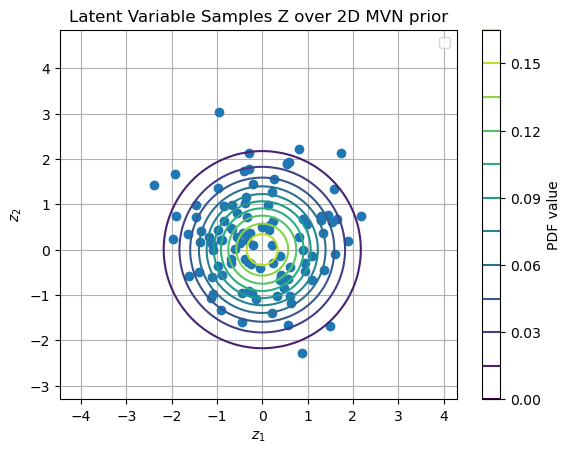

In [323]:
from scipy.stats import multivariate_normal

# 1. Generate some 2D scatter data
np.random.seed(42)
mean = [0,0]
cov = [[1.0, 0.0],
       [0.0, 1.0]]
data = np.random.multivariate_normal(mean, cov, size=300)

# 2. Create a grid over which to evaluate the PDF
x = np.linspace(min(data[:, 0]) - 1, max(data[:, 0]) + 1, 100)
y = np.linspace(min(data[:, 1]) - 1, max(data[:, 1]) + 1, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 3. Define the multivariate normal distribution
rv = multivariate_normal(mean=mean, cov=cov)
Z = rv.pdf(pos)

plt.plot(z_test.detach().numpy()[:,0],z_test.detach().numpy()[:,1],'o')




# Contour plot of the PDF
plt.contour(X, Y, Z, levels=10, cmap='viridis', linewidths=1.5)
plt.colorbar(label='PDF value')

plt.title('Latent Variable Samples Z over 2D MVN prior')
plt.xlabel(r'$z_{1}$')
plt.ylabel(r'$z_{2}$')
plt.legend()
plt.grid(True)
plt.axis('equal')
#plt.show()

plt.savefig('GENIE_BPC_latent_variables_gene_mutations_tt_early_stopping_test_beta_5.png')

In [324]:

binary_matrix_VAE = np.where(reconstructed.detach().numpy()< 0.5, 0, 1)
binary_matrix_VAE_test = np.where(reconstructed_test.detach().numpy()< 0.5, 0, 1)


In [325]:

np.sum((binary_matrix_VAE_test-X_test.detach().numpy())**2)

np.float64(617.0)

In [326]:
# Suppose this is your matrix of probabilities (values in [0, 1])

error=np.zeros(1000)
# Sample from Bernoulli for each element
for j in np.arange(1000):
    samples_test = np.random.binomial(n=1, p=reconstructed_test.detach().numpy())
    error[j]=np.sum((samples_test-X_test.detach().numpy())**2)

In [327]:
error.mean()

np.float64(1106.579)

In [202]:
X_train.shape,X_test.shape

(torch.Size([410, 328]), torch.Size([103, 328]))

In [203]:
np.sum((X_train.detach().numpy()-binary_matrix_VAE)**2)

np.float64(2576.0)

In [204]:
np.sum((X_train.detach().numpy()-binary_matrix_VAE)**2)

np.float64(2576.0)

In [205]:
# Suppose this is your matrix of probabilities (values in [0, 1])

# Sample from Bernoulli for each element
samples = np.random.binomial(n=1, p=reconstructed.detach().numpy())
np.sum((samples-X_train.detach().numpy())**2)

np.float64(4900.0)

# Using only training


In [419]:
epochs=50000
train_loss =[]
reconstruction_loss=[]
# Train function
for epoch in range(1, epochs + 1):
    model.train()
    reconstructed, mu, logvar, z ,std= model(tensor_x)
    #print("std:", std.min().item(), std.max().item())
    #print("mu:", mu.min().item(), mu.max().item())
    #print("logvar:", logvar.min().item(), logvar.max().item())
    #print("z:", z.min().item(), z.max().item())
    #print("reconstructed:", reconstructed.min().item(), reconstructed.max().item())
    loss = loss_function(reconstructed, tensor_x, mu, logvar)
    optimizer.zero_grad()
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    
    if epoch % 1000 == 0:
        print("Train Epoch {} \tLoss: {:.3f}".format(epoch, loss.item()/len(tensor_x)))
        
    #print('=====> Epoch {}, Average Loss: {:.3f}'.format(epoch, train_loss/len(train_loader.dataset)))


Train Epoch 1000 	Loss: 26.870
Train Epoch 2000 	Loss: 25.078
Train Epoch 3000 	Loss: 24.089
Train Epoch 4000 	Loss: 23.337
Train Epoch 5000 	Loss: 22.873
Train Epoch 6000 	Loss: 22.322
Train Epoch 7000 	Loss: 21.913
Train Epoch 8000 	Loss: 21.425
Train Epoch 9000 	Loss: 20.881
Train Epoch 10000 	Loss: 20.514
Train Epoch 11000 	Loss: 20.206
Train Epoch 12000 	Loss: 19.828
Train Epoch 13000 	Loss: 19.595
Train Epoch 14000 	Loss: 19.349
Train Epoch 15000 	Loss: 19.165
Train Epoch 16000 	Loss: 18.940
Train Epoch 17000 	Loss: 18.877
Train Epoch 18000 	Loss: 18.723
Train Epoch 19000 	Loss: 18.516
Train Epoch 20000 	Loss: 18.418
Train Epoch 21000 	Loss: 18.349
Train Epoch 22000 	Loss: 18.197
Train Epoch 23000 	Loss: 18.148
Train Epoch 24000 	Loss: 18.148
Train Epoch 25000 	Loss: 17.989
Train Epoch 26000 	Loss: 17.919
Train Epoch 27000 	Loss: 17.848
Train Epoch 28000 	Loss: 17.864
Train Epoch 29000 	Loss: 17.720
Train Epoch 30000 	Loss: 17.624
Train Epoch 31000 	Loss: 17.555
Train Epoch 32000

In [420]:
z.detach().numpy()[:,1].shape

(513,)

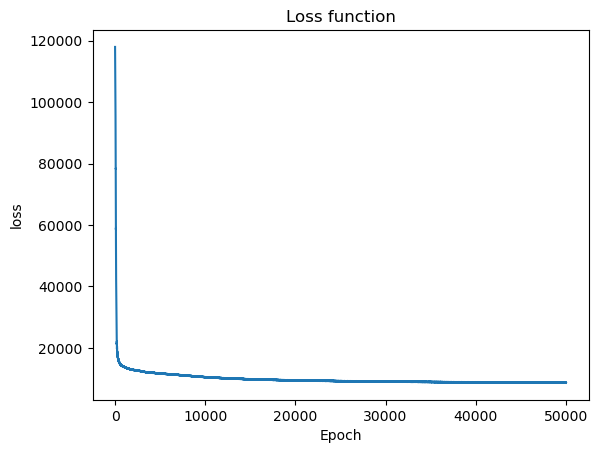

In [421]:
plt.plot(train_loss)
#plt.ylim(0,10)


plt.title('Loss function')
plt.xlabel('Epoch')
plt.ylabel('loss')


plt.savefig('GENIE_BPC_VAE_loss_gene_mutations.png')

C:\Users\sonm\AppData\Local\Temp\ipykernel_2648\1729576725.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


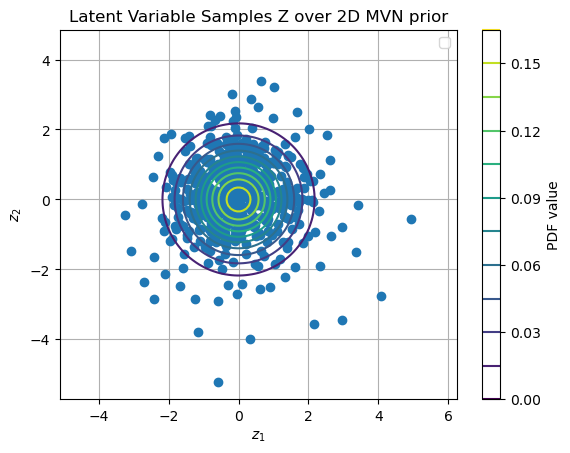

In [422]:
from scipy.stats import multivariate_normal

# 1. Generate some 2D scatter data
np.random.seed(42)
mean = [0,0]
cov = [[1.0, 0.0],
       [0.0, 1.0]]
data = np.random.multivariate_normal(mean, cov, size=300)

# 2. Create a grid over which to evaluate the PDF
x = np.linspace(min(data[:, 0]) - 1, max(data[:, 0]) + 1, 100)
y = np.linspace(min(data[:, 1]) - 1, max(data[:, 1]) + 1, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 3. Define the multivariate normal distribution
rv = multivariate_normal(mean=mean, cov=cov)
Z = rv.pdf(pos)

plt.plot(z.detach().numpy()[:,0],z.detach().numpy()[:,1],'o')




# Contour plot of the PDF
plt.contour(X, Y, Z, levels=10, cmap='viridis', linewidths=1.5)
plt.colorbar(label='PDF value')

plt.title('Latent Variable Samples Z over 2D MVN prior')
plt.xlabel(r'$z_{1}$')
plt.ylabel(r'$z_{2}$')
plt.legend()
plt.grid(True)
plt.axis('equal')
#plt.show()

plt.savefig('GENIE_BPC_latent_variables_gene_mutations.png')

In [423]:
np.sum((reconstructed.detach().numpy()-x)**2)

ValueError: operands could not be broadcast together with shapes (513,328) (100,) 

In [424]:
# Turns into binary matrix based on the predicted probabilities 0 if p<0.5, 1 otherwise:

binary_matrix_VAE = np.where(reconstructed.detach().numpy()< 0.5, 0, 1)

binary_matrix_VAE

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [425]:
np.sum((binary_matrix_VAE-x)**2)

ValueError: operands could not be broadcast together with shapes (513,328) (100,) 

In [426]:
# Suppose this is your matrix of probabilities (values in [0, 1])

# Sample from Bernoulli for each element
samples = np.random.binomial(n=1, p=reconstructed.detach().numpy())
np.sum((samples-x)**2)

ValueError: operands could not be broadcast together with shapes (513,328) (100,) 

# PCA Approach

In [195]:
#import numpy as np
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

# Sample data (replace with your actual data)
#data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Standardize the data (important for PCA)
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(data)

# Create a PCA object, specifying the number of components to retain
pca = PCA(n_components=10)


In [196]:
X_train

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.]])

In [197]:

# Fit PCA to the scaled data
pca.fit(X_train)


PCA(n_components=10)

In [198]:

# Transform the data to the new principal components
transformed_data = pca.transform(X_train)


In [199]:
# Explained variance ratio (how much variance is explained by each component)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.05788573, 0.05516989, 0.0296883 , 0.0262347 , 0.02315053,
       0.02137573, 0.02022329, 0.0186448 , 0.01744213, 0.01656057])

In [200]:

# Print the transformed data and explained variance
#print("Transformed data:\n", transformed_data)
#print("\nExplained variance ratio:", explained_variance)

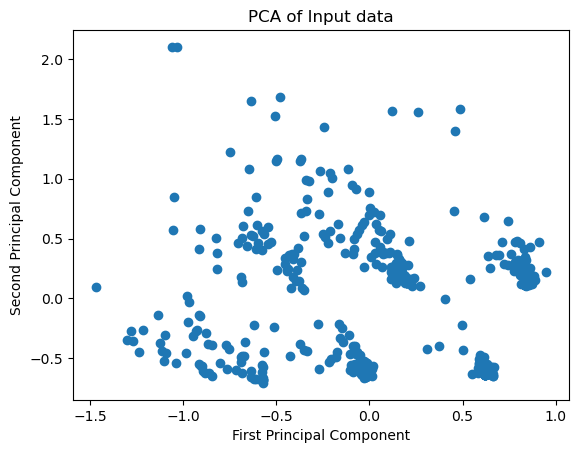

In [201]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Input data')
#plt.show()
plt.savefig('Pincipal Components_gene_mutations_tt.png')

In [202]:
X_reconstructed_PCA = pca.inverse_transform(transformed_data)
X_reconstructed_PCA

array([[ 8.71049666e-01, -1.40737944e-02,  3.63177488e-02, ...,
        -1.25686899e-03, -1.59353847e-03, -6.61852277e-03],
       [ 1.07153900e+00, -9.23356549e-02,  9.53371749e-01, ...,
         7.23254904e-03,  8.98693754e-04,  1.08639322e-03],
       [ 9.31209249e-01,  6.30325133e-02,  1.16725974e-01, ...,
        -2.87253929e-04, -5.67958421e-04, -5.81835055e-03],
       ...,
       [ 6.07651126e-03,  4.72448402e-02,  6.47605152e-02, ...,
         3.72052565e-03,  4.12407364e-03, -6.19280284e-03],
       [ 1.64100287e-03, -8.50039690e-02,  8.70894687e-01, ...,
         9.41601533e-03,  3.21194971e-03,  1.70765804e-02],
       [ 9.48084520e-01,  9.33794154e-01, -1.00719641e-01, ...,
        -5.14630241e-03,  5.37209745e-03,  9.12121746e-03]])

In [203]:
np.sum((X_reconstructed_PCA-X_train.detach().numpy())**2)

np.float64(1671.0923375608297)

In [204]:

binary_matrix_PCA = np.where(X_train.detach().numpy()< 0.5, 0, 1)

binary_matrix_PCA

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [205]:
np.sum((X_train.detach().numpy()-binary_matrix_PCA)**2)

np.float64(0.0)

In [206]:
pca_recon.shape

NameError: name 'pca_recon' is not defined

In [207]:
pca_recon = np.clip(X_reconstructed_PCA, 1e-5, 1 - 1e-5)
bce_pca = -np.sum(X_train.detach().numpy() * np.log(pca_recon) + (1 - X_train.detach().numpy()) * np.log(1 - pca_recon))

In [208]:
bce_pca

np.float64(7250.7311447019465)

In [209]:

X_recon_test = pca.inverse_transform(pca.transform(X_test.detach().numpy()))
X_pred_test = (X_recon_test >= 0.5).astype(int)
loss_test = np.sum((X_test.detach().numpy() - X_pred_test) ** 2)

In [210]:
loss_test

np.float64(450.0)